In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns


In [ ]:

csv_path = "/media/jackson/SOMAI_backup_jja/tortuosity_study/read_csvs/score_tables/r1_no_duplicates_sufficient_tissue.csv"
csv_path2 = "/media/jackson/SOMAI_backup_jja/tortuosity_study/read_csvs/score_tables/r2_scores_no_duplicates_sufficient_tissue.csv"
csv_path3 = "/media/jackson/SOMAI_backup_jja/tortuosity_study/read_csvs/score_tables/r4_scores.csv"

df1 = pd.read_csv(csv_path)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

df1['Read'] = 'Read 1'
df2['Read'] = 'Read 2'
df3['Read'] = 'Read 3'

fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True, )
sns.set_theme(style='darkgrid')
plt.rc('axes', titlesize=18)     # Axes title size
plt.rc('axes', labelsize=16)     # Axes labels size
plt.rc('xtick', labelsize=16)    # X-tick labels size
plt.rc('ytick', labelsize=16)    # Y-tick labels size
plt.rc('legend', fontsize=12)    # Legend font size
plt.rc('figure', titlesize=20)   # Figure title size


widths = [0.35, 0.60, 0.60]
xticks = [['Low', 'Medium', 'High'], ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'], ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']]
labels = [['Rater 1', 'Rater 2', 'Rater 3'], ['Rater 1', 'Rater 2', 'Rater 3', 'BiopTort'], ['Rater 1', 'Rater 2', 'Rater 3', 'BiopTort']]

for i, df in enumerate([df1, df2, df3]):
    melted_df = pd.melt(df, id_vars='Read', var_name='Rater', value_name='Score')
    ax[i] = sns.countplot(
        data=melted_df,
        x="Score", hue="Rater", palette="dark",
        ax=ax[i],
        legend=True,
        width=widths[i]
    )
    ax[i].set_title(f"Read {i+1}")

    # Set custom labels in the legend
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, labels[i], title='Rater')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel('Score')
    ax[i].set_xticklabels(xticks[i])
plt.suptitle("Tortuosity Score Distributions for Each Read")
plt.tight_layout()
plt.savefig("figures/score_distribution.png", dpi=300)





In [2]:
df3 = pd.read_csv('/home/jackson/research/data/tortuosity_study/read_csvs/dan_dryrun2.csv')

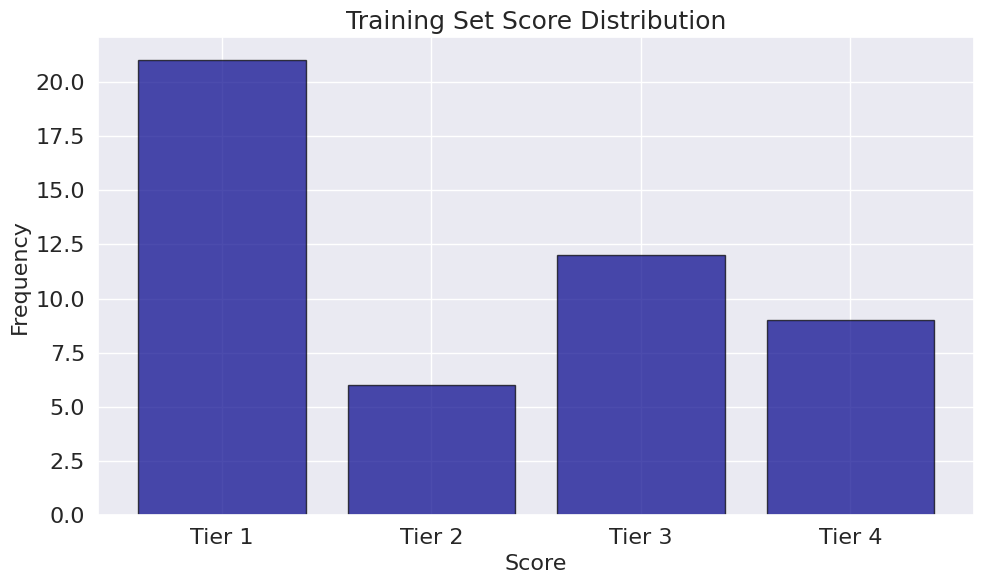

In [8]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')
plt.rc('axes', titlesize=18)     # Axes title size
plt.rc('axes', labelsize=16)     # Axes labels size
plt.rc('xtick', labelsize=16)    # X-tick labels size
plt.rc('ytick', labelsize=16)    # Y-tick labels size
plt.rc('legend', fontsize=12)    # Legend font size
plt.rc('figure', titlesize=20)   # Figure title size

# Create histogram with spacing between bars
plt.hist(df3['val'], bins=np.arange(0.5, 5.5, 1), color='darkblue', alpha=0.7, edgecolor='black', rwidth=0.8)

# Set custom x-ticks and center labels
plt.xticks([1, 2, 3, 4], ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])

plt.title("Training Set Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../figures/training_set_score_dist.png", dpi=300)
plt.show()